In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('D:/data/House/1632300362534233.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [6]:
df.Area = df.Area.str.replace(',','')

In [7]:
df.Area = pd.to_numeric(df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x190c2828710>,
 'caps': [<matplotlib.lines.Line2D at 0x190c2828cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x190c27eb3b0>],
 'medians': [<matplotlib.lines.Line2D at 0x190c28292b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x190c28295b0>],
 'means': []}

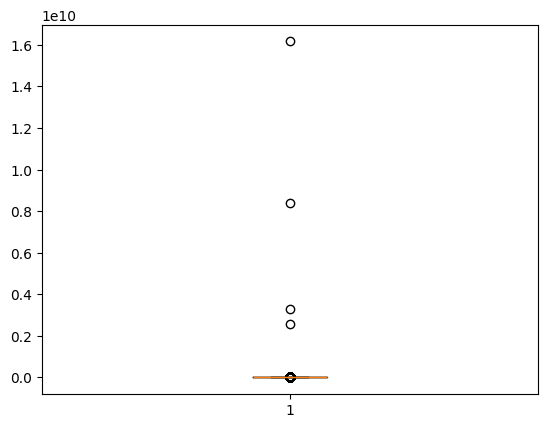

In [8]:
plt.boxplot(df.Area)

In [9]:
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
df = df[(df['Area'] >= lower_bound) & (df['Area'] <= upper_bound)]

In [12]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [13]:
LE = preprocessing.LabelEncoder().fit(['False','True'])
df.Parking = LE.transform(df.Parking)
df.Warehouse = LE.transform(df.Warehouse)
df.Elevator = LE.transform(df.Elevator)

C:\Users\hp\AppData\Local\Temp\ipykernel_8572\742197632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Parking = LE.transform(df.Parking)
C:\Users\hp\AppData\Local\Temp\ipykernel_8572\742197632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Warehouse = LE.transform(df.Warehouse)
C:\Users\hp\AppData\Local\Temp\ipykernel_8572\742197632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [14]:
df['Price_Per_Meter(USD)'] = df['Price(USD)']/df.Area

C:\Users\hp\AppData\Local\Temp\ipykernel_8572\1987165282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Per_Meter(USD)'] = df['Price(USD)']/df.Area


In [15]:
df_plotting = df.drop(['Address','Price'],axis=1)

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Warehouse'}>,
        <Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price(USD)'}>],
       [<Axes: title={'center': 'Price_Per_Meter(USD)'}>, <Axes: >,
        <Axes: >]], dtype=object)

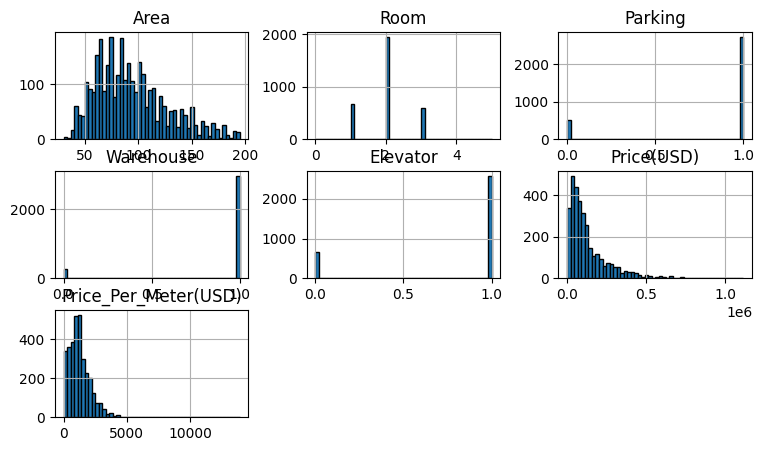

In [16]:
df_plotting.hist(figsize=(9,5),edgecolor='black',bins=50)

In [17]:
df.Elevator.value_counts()

Elevator
1    2563
0     672
Name: count, dtype: int64

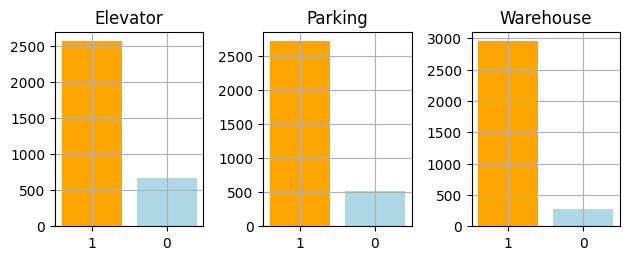

In [18]:
# Elevator Bar Chart
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax1.bar(df.Elevator.value_counts().keys().astype('str'),df.Elevator.value_counts().values,color=['orange','lightblue'])
plt.grid()
ax1.set_title("Elevator")

# Parking Bar Chart
ax2 = fig.add_subplot(2,3,2)
ax2.bar(df.Parking.value_counts().keys().astype('str'),df.Parking.value_counts().values,color=['orange','lightblue'])
plt.grid()
ax2.set_title("Parking")

# Warehouse Bar Chart
ax3 = fig.add_subplot(2,3,3)
ax3.bar(df.Warehouse.value_counts().keys().astype('str'),df.Warehouse.value_counts().values,color=['orange','lightblue'])
plt.grid()
ax3.set_title("Warehouse")

plt.tight_layout()

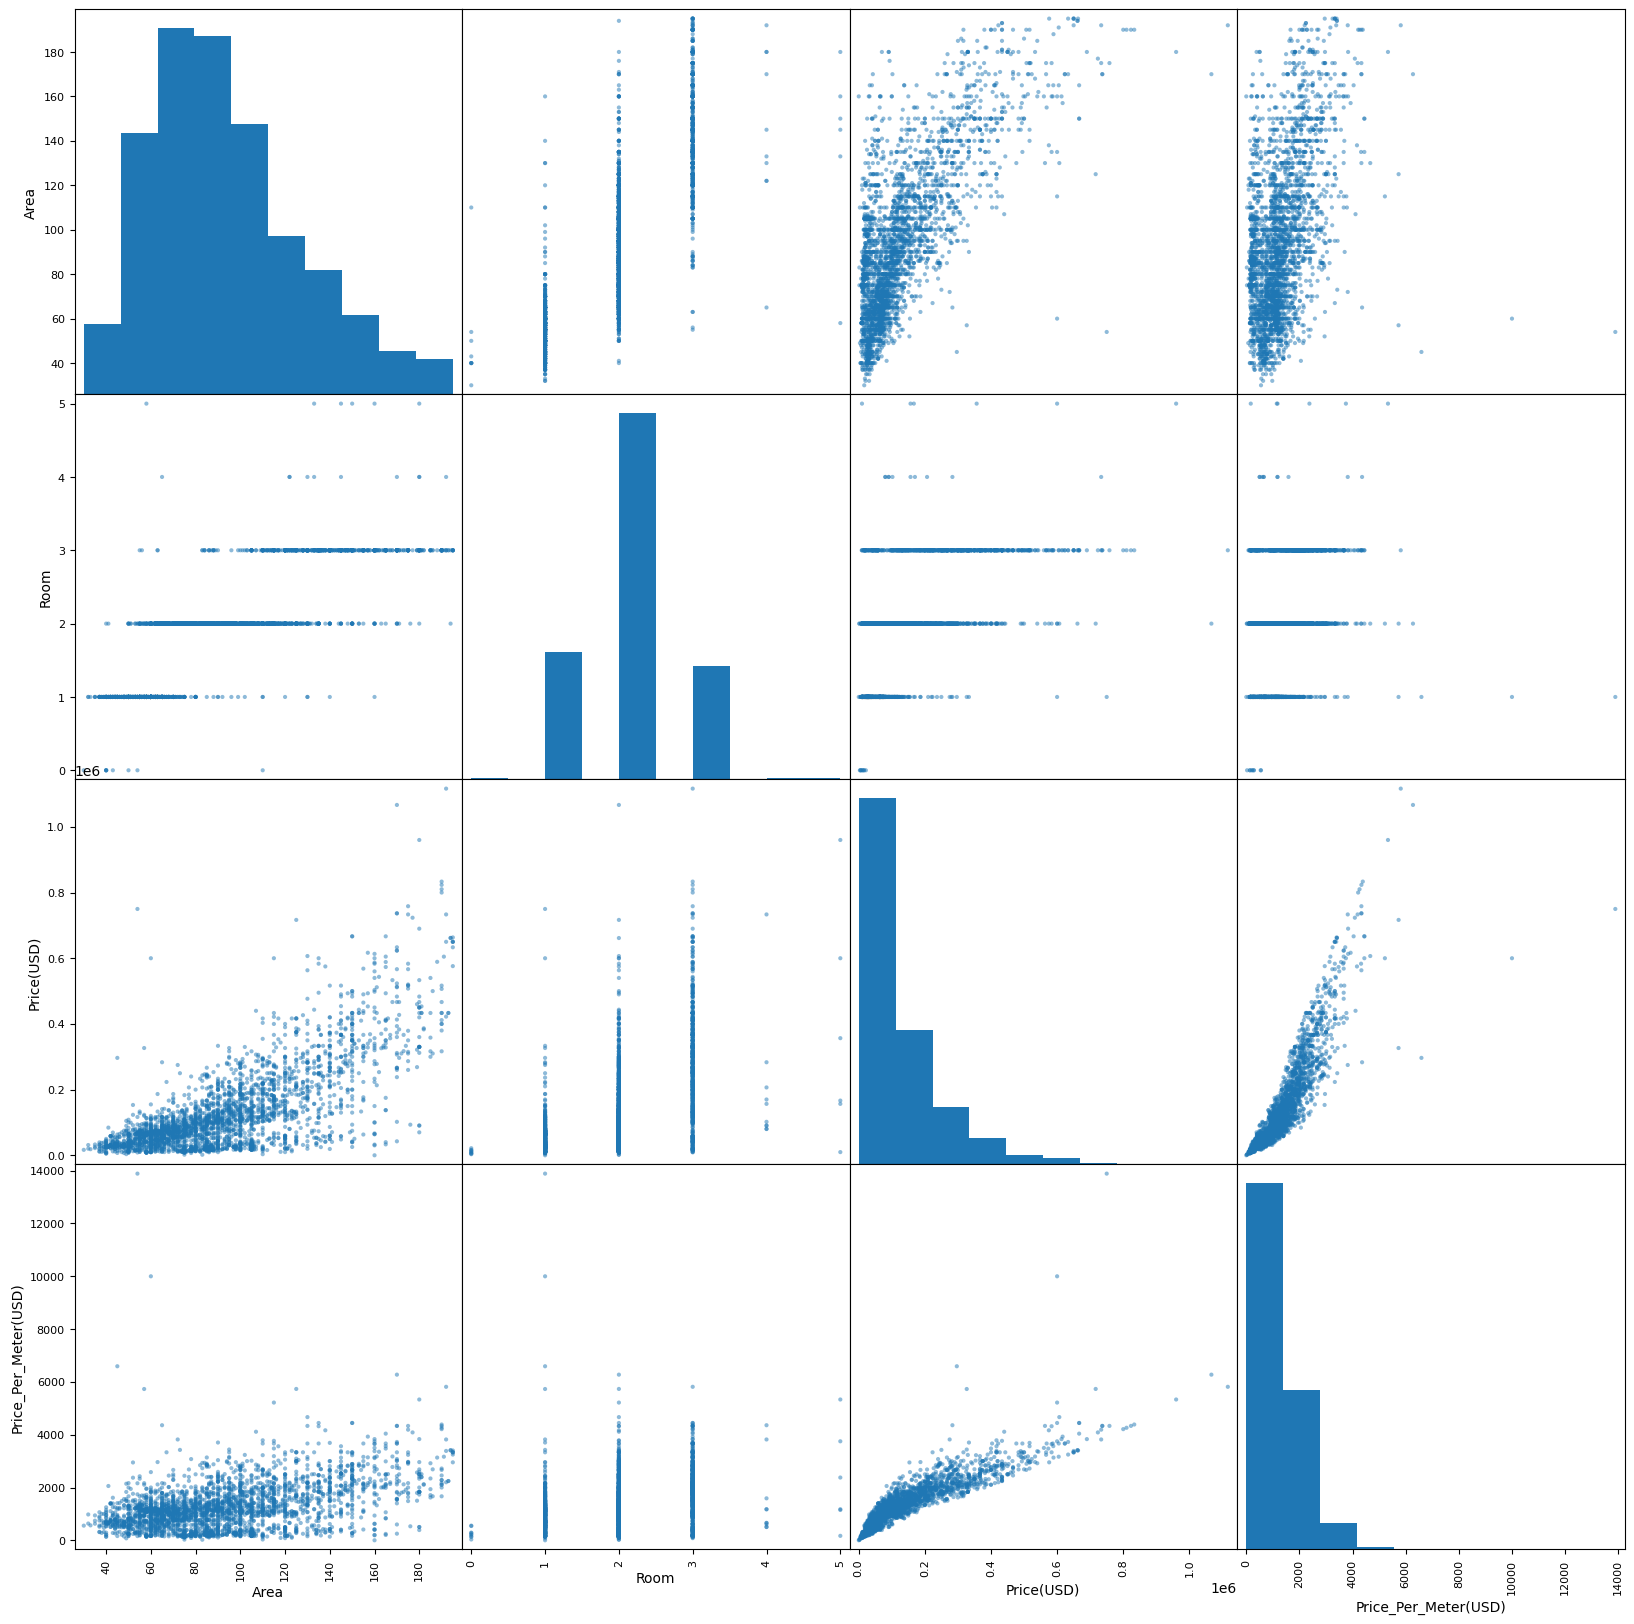

In [19]:
pd.plotting.scatter_matrix(df_plotting.drop(['Parking','Elevator','Warehouse'],axis=1),figsize=(20,20))
plt.show()

In [20]:
OHE = preprocessing.OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encoder = OHE.fit_transform(df[['Address']])
df = pd.concat([df,encoder],axis=1).drop('Address',axis=1)

In [21]:
lower = df.corr()['Price(USD)'][(df.corr()['Price(USD)'] <0.1) & (df.corr()['Price(USD)'] > -0.1)].index
df = df.drop(lower,axis=1)

In [22]:
df.corr()['Price(USD)'].sort_values(ascending=False)

Price(USD)                1.000000
Price                     1.000000
Price_Per_Meter(USD)      0.892697
Area                      0.730814
Room                      0.530618
Address_Gheitarieh        0.290627
Parking                   0.285706
Elevator                  0.265680
Address_Niavaran          0.262453
Address_Shahrake Gharb    0.232570
Address_Saadat Abad       0.198005
Address_Zaferanieh        0.197875
Address_Farmanieh         0.186846
Address_Velenjak          0.175164
Address_Pasdaran          0.174889
Warehouse                 0.170903
Address_Kamranieh         0.147591
Address_Aqdasieh          0.106058
Address_Marzdaran         0.101025
Address_Andisheh         -0.113651
Address_Shahrake Qods    -0.114846
Address_Pardis           -0.176062
Address_Parand           -0.177022
Name: Price(USD), dtype: float64

In [ ]:
for i in range(1, 23):
    std = preprocessing.StandardScaler()
    Xtrain_scaled2 = std.fit_transform(Xtrain)
    Xtest_scaled2 = std.transform(Xtest)
    
    pca = PCA(random_state=42, n_components=i)
    Xtrain_scaled2 = pca.fit_transform(Xtrain_scaled2)
    Xtest_scaled2 = pca.transform(Xtest_scaled2)
    
    model2 = RandomForestRegressor(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
    model2.fit(Xtrain_scaled2, ytrain)
    
    pred2 = model2.predict(Xtest_scaled2)
    r22 = metrics.r2_score(ytest, pred2)
    
    print(f"Number of Components: {i}, R² Score: {r22}")
    print(f"Mean Absolute Error: {metrics.mean_absolute_error(ytest, pred2)}")

In [23]:
X = df.drop(['Price(USD)','Price'],axis=1)
y = df['Price']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

std = preprocessing.StandardScaler()
Xtrain_scaled = std.fit_transform(Xtrain)
Xtest_scaled = std.transform(Xtest)

model = RandomForestRegressor(random_state=42, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
model.fit(Xtrain_scaled,ytrain)

pred = model.predict(Xtest_scaled)
r2 = metrics.r2_score(pred,ytest)

print(f'r2_score: {r2}')
print(f'mean_absolute_error: {metrics.mean_absolute_error(pred,ytest)}')

r2_score: 0.996051470560057
mean_absolute_error: 65063826.18285161


In [ ]:
std = preprocessing.StandardScaler()
inputs = 

In [247]:
print(model.score(Xtrain_scaled,ytrain))
print(model.score(Xtest_scaled,ytest))

0.9987824288495845
0.9960974484924469


In [24]:
scoring = cross_val_score(model,Xtrain_scaled,ytrain,cv=10,scoring='neg_mean_absolute_error')
scored = -scoring
print(f'cross_val_score:{scored}')
print(f'mean cross_val_score:{np.mean(scored)}')

cross_val_score:[1.65581830e+08 8.72515714e+07 4.64472797e+07 6.81300340e+07
 6.01883535e+07 5.05174176e+07 4.80396695e+07 4.19134081e+07
 8.15202569e+07 9.15485804e+07]
mean cross_val_score:74113840.12416956


In [243]:
# تعریف مدل RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# تعریف پارامترها برای GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# ایجاد GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

# آموزش مدل با GridSearch
grid_search.fit(Xtrain_scaled, ytrain)

# بهترین پارامترها
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_absolute_error):", -grid_search.best_score_)

# پیش‌بینی با بهترین مدل
best_model = grid_search.best_estimator_
pred = best_model.predict(Xtest_scaled)

# ارزیابی مدل
print("R² Score:", metrics.r2_score(ytest, pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, pred))


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score (neg_mean_absolute_error): 2689.324526693352
R² Score: 0.9958900582750907
Mean Absolute Error: 2153.9806517001625


In [251]:
import joblib
joblib.dump(model,'D:/data/House/housePrediction.sav')

['D:/data/House/housePrediction.sav']